In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

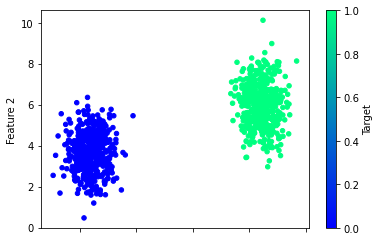

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5867
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.6133
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5427
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5293
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.7373
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.7653
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.7907
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.8133
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.8267
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.8453
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9960
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.9960
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9960
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.9960
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9960
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9960
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9960
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1004 - accuracy: 0.9973
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9973
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9987
Epoch 93/100


<AxesSubplot:>

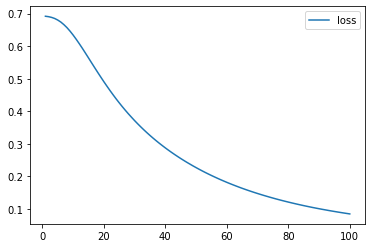

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

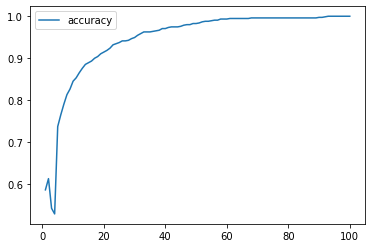

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0846 - accuracy: 1.0000 - 163ms/epoch - 20ms/step
Loss: 0.08459272980690002, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 95ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [15]:
#Now that we have designed a basic single-neuron, single-layer model, trained the model, and evaluated its performance using a test dataset, we are ready to start testing the limits of the basic neural network. As previously mentioned, simple linear regression and singular perceptron models work really well as a binary classifier when the data is linearly separable. But what about nonlinear data? How does our basic neural network model behave when data becomes more complicated?

#To test this behavior, let's generate some new dummy data. This time we'll generate some nonlinear moon-shaped data using Scikit-learn's make_moons method and visualize it using Pandas and Matplotlib. Using the same notebook, we'll add and run the following code:

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

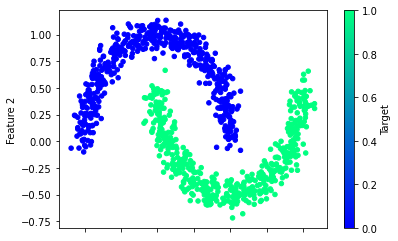

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
#Since we are not changing the structure of our neural network, nor are we changing its function, we can use the same Sequential model object. The only difference from our previous workflow is this time we will retrain and evaluate on the nonlinear moon-shaped data.
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1705 - accuracy: 0.4173
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0447 - accuracy: 0.4413
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9558 - accuracy: 0.4573
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8965 - accuracy: 0.4760
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8499 - accuracy: 0.4960
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8122 - accuracy: 0.5013
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7792 - accuracy: 0.5120
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7511 - accuracy: 0.5240
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7267 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.5400
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8600
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2972 - accuracy: 0.8640
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.8653
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2945 - accuracy: 0.8653
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.8667
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2915 - accuracy: 0.8680
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2901 - accuracy: 0.8680
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8680
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2876 - accuracy: 0.8680
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2865 - accuracy: 0.8680
Epoch 93/100


<AxesSubplot:>

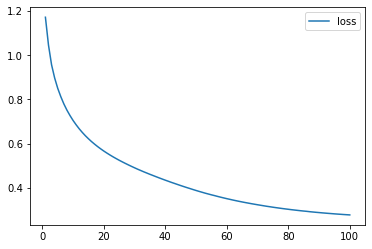

In [19]:
#In our example, TensorFlow stopped training the model after 84 epochs because the loss metric was no longer decreasing at a substantial rate, and the accuracy was not improving.

#Let's plot out the loss and accuracy curves over our training iterations. Again, we'll add and run the following code to the notebook:

# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

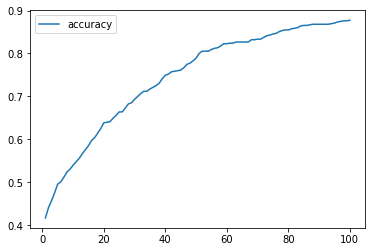

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
#Multi-layer Networks

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7967 - accuracy: 0.2933
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7409 - accuracy: 0.3507
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.4187
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6493 - accuracy: 0.5280
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.6000
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.6440
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.6973
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7520
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.7800
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7880
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9173
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9187
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9187
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 0.9213
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9213
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1912 - accuracy: 0.9213
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9213
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9227
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9213
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.9227
Epoch 93/100


In [25]:
#Practice Encoding Categorical Variables
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv(r"C:\Users\Surface\Desktop\Class\Neural Networks\ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

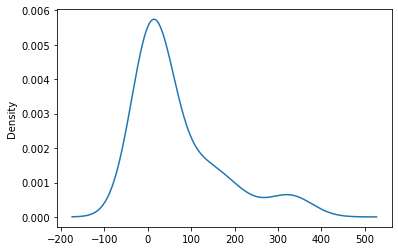

In [26]:
# Visualize the value counts
country_counts.plot.density()

In [27]:
#According to the density plot, the most common unique values have more than 100 instances within the dataset. Therefore, we can bucket any country that appears fewer than 100 times in the dataset as "other." To do this, we'll use a Python for loop and Pandas' replace method. To our notebooks, we need to add and run the following code:

# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [28]:
#Now that we have reduced the number of unique values in the country variable, we're ready to transpose the variable using one-hot encoding. The easiest way to perform one-hot encoding in Python is to use Scikit-learn's OneHotEncoder module on the country variable. To build the encoded columns, we must create an instance of OneHotEncoder and "fit" the encoder with our values. Again, we must add and run the following code:

# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

C:\Users\Surface\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#We must join the encoded DataFrame with the original and drop the original "Country" column. The process of joining the two DataFrames together is handled by the Pandas merge method and can be performed within one line. Finally, we'll add and run the final code block:

# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

C:\Users\Surface\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
#Standardizing data 


In [32]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv(r"C:\Users\Surface\Desktop\Class\Neural Networks\hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [33]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [34]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [35]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [36]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


In [40]:
#Real Deep learning dataset 
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv(r'C:\Users\Surface\Desktop\Class\Neural Networks\HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [41]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [42]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [43]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

C:\Users\Surface\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [44]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

C:\Users\Surface\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [45]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\Surface\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
#At last, our data is preprocessed and separated and ready for modelling. For our purposes, we will use the same framework we used for our basic neural network:

#For our input layer, we must add the number of input features equal to the number of variables in our feature DataFrame.
#In our hidden layers, our deep learning model structure will be slightly different—we'll add two hidden layers with only a few neurons in each layer. To create the second hidden layer, we'll add another Keras Dense class while defining our model. All of our hidden layers will use the relu activation function to identify nonlinear characteristics from the input values.
#In the output layer, we'll use the same parameters from our basic neural network including the sigmoid activation function. The sigmoid activation function will help us predict the probability that an employee is at risk for attrition.

In [48]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 448       
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 3403.1829 - accuracy: 0.1724
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 1437.9927 - accuracy: 0.2123
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 324.3839 - accuracy: 0.5944
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 93.4103 - accuracy: 0.7414
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 73.8342 - accuracy: 0.7877
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 66.7259 - accuracy: 0.7695
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 56.7178 - accuracy: 0.7713
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 41.7890 - accuracy: 0.7568
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 28.1582 - accuracy: 0.7523
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 16.2189 - accuracy: 0

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 1.0562 - accuracy: 0.8641 - 190ms/epoch - 16ms/step
Loss: 1.0561844110488892, Accuracy: 0.864130437374115


In [52]:
#Let's practice generating checkpoint files and loading model weights from different epochs
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [53]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
29/35 [=======================>......] - ETA: 0s - loss: 0.8596 - accuracy: 0.6218  
Epoch 1: saving model to checkpoints\weights.01.hdf5
35/35 [==============================] - 2s 3ms/step - loss: 0.8548 - accuracy: 0.6189
Epoch 2/100
22/35 [=================>............] - ETA: 0s - loss: 0.6659 - accuracy: 0.6705
Epoch 2: saving model to checkpoints\weights.02.hdf5
35/35 [==============================] - 0s 3ms/step - loss: 0.6283 - accuracy: 0.6797
Epoch 3/100
18/35 [==============>...............] - ETA: 0s - loss: 0.5308 - accuracy: 0.7135
Epoch 3: saving model to checkpoints\weights.03.hdf5
35/35 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7477
Epoch 4/100
19/35 [===============>..............] - ETA: 0s - loss: 0.4364 - accuracy: 0.8158
Epoch 4: saving model to checkpoints\weights.04.hdf5
35/35 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.8031
Epoch 5/100
23/35 [==================>...........] - ETA: 

Epoch 36/100
21/35 [=================>............] - ETA: 0s - loss: 0.2644 - accuracy: 0.8899
Epoch 36: saving model to checkpoints\weights.36.hdf5
35/35 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.8920
Epoch 37/100
31/35 [=========================>....] - ETA: 0s - loss: 0.2591 - accuracy: 0.8962
Epoch 37: saving model to checkpoints\weights.37.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.8938
Epoch 38/100
34/35 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.8971
Epoch 38: saving model to checkpoints\weights.38.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.8956
Epoch 39/100
 1/35 [..............................] - ETA: 0s - loss: 0.2725 - accuracy: 0.9062
Epoch 39: saving model to checkpoints\weights.39.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8947
Epoch 40/100
35/35 [==============================] 

35/35 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9201
Epoch 71/100
35/35 [==============================] - ETA: 0s - loss: 0.2168 - accuracy: 0.9247
Epoch 71: saving model to checkpoints\weights.71.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9247
Epoch 72/100
32/35 [==========================>...] - ETA: 0s - loss: 0.2152 - accuracy: 0.9229
Epoch 72: saving model to checkpoints\weights.72.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9238
Epoch 73/100
31/35 [=========================>....] - ETA: 0s - loss: 0.2087 - accuracy: 0.9244
Epoch 73: saving model to checkpoints\weights.73.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9229
Epoch 74/100
34/35 [============================>.] - ETA: 0s - loss: 0.2092 - accuracy: 0.9256
Epoch 74: saving model to checkpoints\weights.74.hdf5
35/35 [==============================] - 0s 2ms/step

In [54]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


12/12 - 0s - loss: 0.3070 - accuracy: 0.8940 - 210ms/epoch - 17ms/step
Loss: 0.30703243613243103, Accuracy: 0.89402174949646


In [55]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [56]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [57]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.3070 - accuracy: 0.8940 - 153ms/epoch - 13ms/step
Loss: 0.30703243613243103, Accuracy: 0.89402174949646
